# Exo Matplotlib/Seaborn avec JO-dataset

0. __Pour chaque graphique, ajouter un titre qui contient les axes/colonnes utilisé pour le graphique__ 
    - __attention:__ pour chaque graphique, il faudra appiquer une transformation sur le data pour qu'il soit adapté à la construction des graphiques demandé <br><br>

  
1. __Faire un (line-)plot qui montre:__<br>
    - le nombre uniques de sports par année
    - placer des points comme marqueurs
    - changer le style de ligne en pointillé
<br><br>

2. __Faire un graphique composé qui montre:__<br>
    - le nombre uniques de sports par année (voir 1.)
    - avec une décomposition par genre homme-femme, indiqué dans une légende
    - changer les couleurs en 'cyan' et 'magenta'
    - appliquer un 'alpha' de '0.5'
    - changer la légende de position: en bas à gauche
<br><br>
3. __Faire un bar-plot qui montre:__<br>
    - le top 10 des noms 
    - qui ont participés aux plus de sports différents, 
    - trié par: nombre de sports différents, nombre de médailles
    - changer l'orientation des labels sur l'axe-x ('xticks')
    - changer le nom de l'axe-x: 'top 10' ('xlabel')
<br><br>

4. __Faire un pie-plot qui montre les info de 'Carl Schuhmann':__<br>

    - le nombre de médailles (confondues) pour chaque sport
    - avec le type de sport pour lequel cet athlète a le plus de medailles, mis en évidence
<br><br>

5. __Faire un histogramme qui montre:__<br>
    - l'age
    - par tranche d'age de 3 années
<br><br>

6. __Faire graphique composé d' histogrammes qui montre:__ <br>
    - la taille (height)
    - par tranche de 4 cm
    - decomposé par homme-femme
    - avec un alpha = 0.6

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/Exercices_Pandas_athlete_events.csv')
data.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


  
1. __Faire un (line-)plot qui montre:__<br>
    - le nombre de sports uniques par année
    - placer des points comme marqueurs
    - changer le style de ligne en pointillé


In [3]:
GB1 = data[['Year','Sport']].groupby(['Year']).agg({'Sport':['nunique','count']})
display(GB1.head())

## ici, ceci est suffisant
GB1_ = data[['Year','Sport']].groupby(['Year']).nunique()

## aussi ok:
GB1__ = data[['Year','Sport']].drop_duplicates(subset=['Year','Sport']).groupby(['Year']).count()

print('-'*30)
display(GB1_.head(2))
display(GB1__.head(2))

Sport      
     nunique count
Year              
1896       9   380
1900      20  1936
1904      18  1301
1906      13  1733
1908      24  3101

------------------------------


,Sport
Year,
1896,9
1900,20


,Sport
Year,
1896,9
1900,20


SELECT COUNT (DISTINCT Sport) as 'nunique', COUNT(Sport) as 'count', Year  
FROM data  
GROUP BY Year  
(ORDER BY Year)  


[ https://matplotlib.org/stable/api/markers_api.html ]

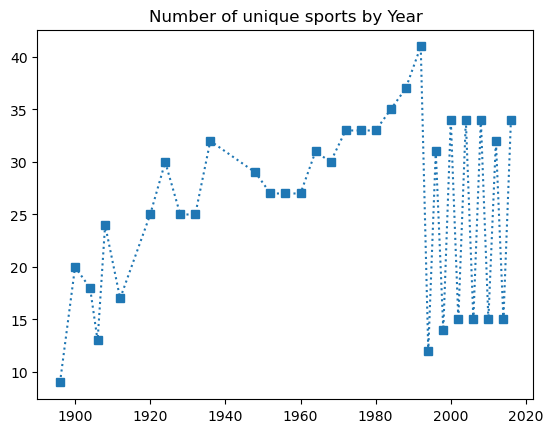

In [4]:
plt.title('Number of unique sports by Year')


# lineplot matplotlib
plt.plot(GB1.index 
         ,GB1[('Sport','nunique')]  #attention au multi-index
         ,linestyle =':' # '-', '--'
         ,marker = 's' #'.'
        ) 

plt.show()


In [5]:
GB1.columns

MultiIndex([('Sport', 'nunique'),
            ('Sport',   'count')],
           )

,Sp_nunique,Sp_count
Year,,
1896,9,380
1900,20,1936
1904,18,1301
1906,13,1733
1908,24,3101


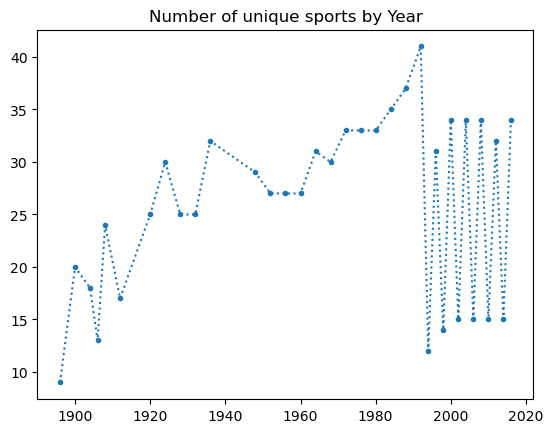

In [6]:
GB1_ = GB1.copy()

GB1_.columns = ['Sp_nunique','Sp_count'] # remplacer les multi-indexes
display(GB1_.head())


plt.title('Number of unique sports by Year')
plt.plot(GB1_.index
         , GB1_.Sp_nunique # GB1_['Sp_nunique']
         ,linestyle =':'
         ,marker = '.')
plt.show()

### seaborn

In [7]:
GB1_ = GB1_.reset_index()
display(GB1_)

,Year,Sp_nunique,Sp_count
0,1896,9,380
1,1900,20,1936
2,1904,18,1301
3,1906,13,1733
4,1908,24,3101
5,1912,17,4040
6,1920,25,4292
7,1924,30,5693
8,1928,25,5574
9,1932,25,3321


[ https://seaborn.pydata.org/generated/seaborn.lineplot.html ]

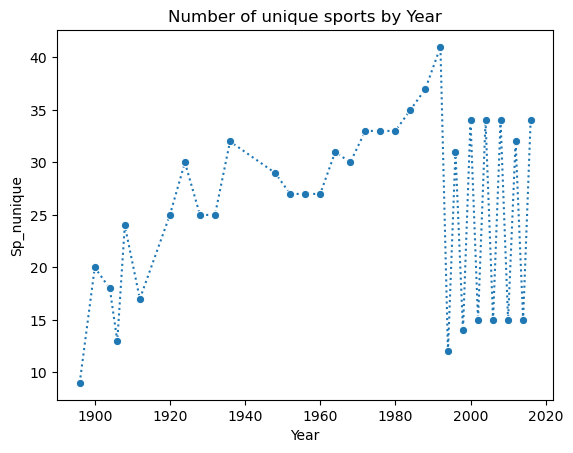

In [8]:

plt.title('Number of unique sports by Year')
sns.lineplot(data=GB1_ # c'est quoi le dataframe
             ,x = 'Year' # les noms de colonnes
             ,y = 'Sp_nunique'
             ,linestyle=':'
             ,marker="o"
            )

#plt.ylabel('distinct count sport')
plt.show()

2. __Faire un graphique composé (superposé) qui montre:__<br>
    - le nombre de sports uniques par année (voir 1.)
    - avec une décomposition par genre homme-femme, indiqué dans une légende
    - changer les couleurs en 'cyan' et 'magenta'
    - appliquer un 'alpha' de '0.5'
    - changer la légende de position: en dessous de l'axe-x


In [9]:
cond_H = data['Sex'] == 'M'
cond_F = data['Sex'] == 'F' # Series Booléene ==> indexation Booléene

GB2H = data.loc[cond_H,['Year'
                        ,'Sport'
                        ,'Sex'
                       ]].groupby('Year').agg({'Sport':['nunique','count']}).reset_index()

GB2H.columns= ['Year','H_Sp_nunique','H_Sp_count']

GB2F = data.loc[cond_F,['Year'
                        ,'Sport'
                        ,'Sex'
                       ]].groupby('Year').agg({'Sport':['nunique','count']}).reset_index()

GB2F.columns= ['Year','F_Sp_nunique','F_Sp_count']

display(GB2F.head(3))
display(GB2H.head(3))

,Year,F_Sp_nunique,F_Sp_count
0,1900,5,33
1,1904,1,16
2,1906,1,11


,Year,H_Sp_nunique,H_Sp_count
0,1896,9,380
1,1900,20,1903
2,1904,18,1285


https://matplotlib.org/stable/api/legend_api.html

exemples sur internet

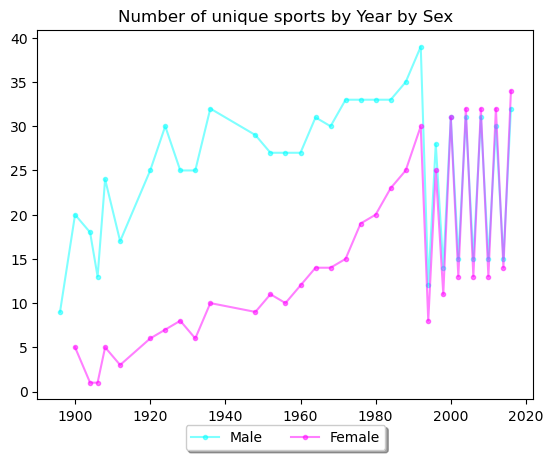

In [10]:
pars = {'marker':'.','alpha':0.5}

plt.title('Number of unique sports by Year by Sex')


plt.plot(GB2H['Year'], GB2H['H_Sp_nunique'] ,label = 'Male',**pars , color = 'cyan')
plt.plot(GB2F['Year'], GB2F['F_Sp_nunique'] ,label = 'Female', **pars, color = 'magenta')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
plt.show()

### seaborn

Sex,F,M
Year,,
1896,NaN,9.0
1900,5.0,20.0
1904,1.0,18.0
1906,1.0,13.0
1908,5.0,24.0
1912,3.0,17.0
1920,6.0,25.0
1924,7.0,30.0
1928,8.0,25.0


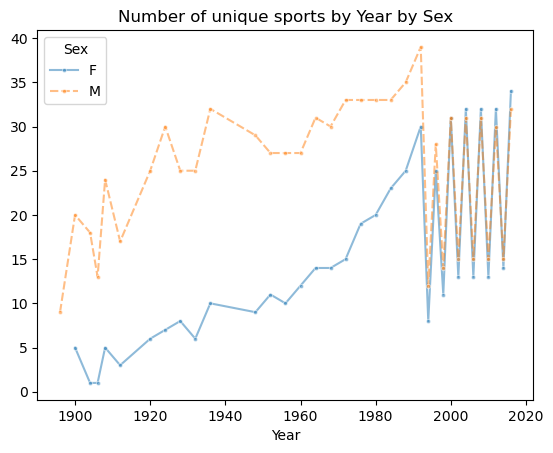

In [11]:

PT2 = data.pivot_table(
    index = 'Year'
    ,columns = 'Sex'
    ,values = 'Sport'
    ,aggfunc = 'nunique' # count, sum
)
display(PT2)

plt.title('Number of unique sports by Year by Sex')
sns.lineplot(data = PT2, **pars)

plt.show()

,Year,Sex,Sport
0,1896,M,9
1,1900,F,5
2,1900,M,20
3,1904,F,1
4,1904,M,18
...,...,...,...
64,2012,M,30
65,2014,F,14
66,2014,M,15
67,2016,F,34


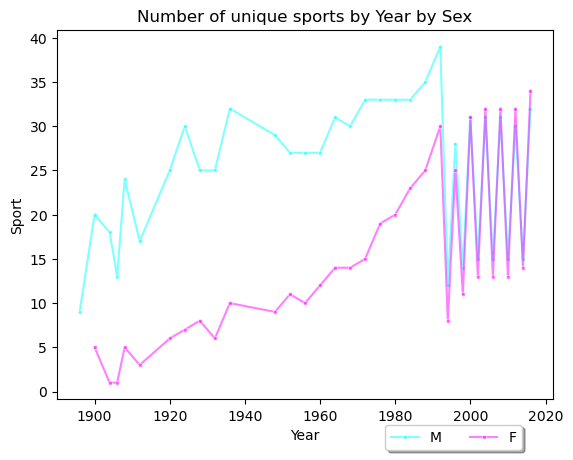

In [12]:
GB2 = data[['Year','Sex','Sport']].groupby(['Year','Sex']).nunique()
GB2 = GB2.reset_index()
display(GB2)

plt.title('Number of unique sports by Year by Sex')
sns.lineplot(data = GB2
             ,x='Year'
             ,y = 'Sport'
             ,**pars
             ,hue='Sex' # teinte/couleur dépend de la colonne 'Sex'
             ,palette={'M':'cyan','F':'magenta'}) # impose un choix de couleur

plt.legend(loc='upper center', bbox_to_anchor=(0.8, -0.05),
          fancybox=True, shadow=True, ncol=2)
plt.show()

    
3. __Faire un bar-plot qui montre:__<br>
    - le top 10 des noms 
    - qui ont participés à le plus de sports différents, 
    - trié par nombre de sports différents, nombre de médailles
    - changer l'orientation des labels sur l'axe-x ('xticks')
    - changer le nom de l'axe-x: 'top 10' ('xlabel')
    

In [13]:
GB3 = data[['Name'
            ,'Sport'
            ,'Medal']].groupby('Name').agg({'Sport':['nunique','count']
                                            ,'Medal':['count', 'nunique']
                                           })

GB3 = GB3.sort_values(by=[('Sport','nunique') ## trier sur (sport,nunique) ,
                          ,('Medal','count'),] ## puis (si execo) sur (medal, count)
                      ,ascending=False
                     ).head(10)
display(GB3)

Sport       Medal        
                       nunique count count nunique
Name                                              
Wang Nan                     5    11     5       2
Kim Seong-Eun                5     6     0       0
Wolfgang Mller               5    11     0       0
Zhang Li                     5     8     0       0
Wang Hao                     4    11     6       2
Chen Jing                    4    11     5       3
Carl Schuhmann               4    12     4       1
Alexander Viggo Jensen       4    12     3       3
Peter Mller                  4     6     3       2
Kim Yun-Mi                   4     7     2       1

In [14]:
#### start look details

### ignore:

### voir d'ou viennent les medailles

GB2_ = data[['Name','Sport','Medal']].groupby(['Name','Sport']).agg({'Medal':['count','nunique'],'Sport':'count'}).reset_index()
GB2_.sort_values(by=[('Medal','count')], ascending=False, inplace=True)
display(GB2_)



Name          Sport Medal         Sport
                                                          count nunique count
87965              Michael Fred Phelps, II       Swimming    28       3    30
74150   Larysa Semenivna Latynina (Diriy-)     Gymnastics    18       3    19
95032         Nikolay Yefimovich Andrianov     Gymnastics    15       3    24
16391          Borys Anfiyanovych Shakhlin     Gymnastics    13       3    24
96448                  Ole Einar Bjrndalen       Biathlon    13       3    26
...                                    ...            ...   ...     ...   ...
50947                      Hugo Huybrechts     Volleyball     0       0     1
50946                          Hugo Hoyama   Table Tennis     0       0    11
50945                           Hugo Houle        Cycling     0       0     2
50944                  Hugo Higueras Ureta        Fencing     0       0     1
136587                            zzet nce  Weightlifting     0       0     2

[136588 rows x 5 columns]

In [15]:
GB2_[GB2_['Name']=='Carl Schuhmann']

#### end look details

Name          Sport Medal         Sport
                                     count nunique count
18163  Carl Schuhmann     Gymnastics     3       1     7
18165  Carl Schuhmann      Wrestling     1       1     1
18164  Carl Schuhmann  Weightlifting     0       0     1
18162  Carl Schuhmann      Athletics     0       0     3

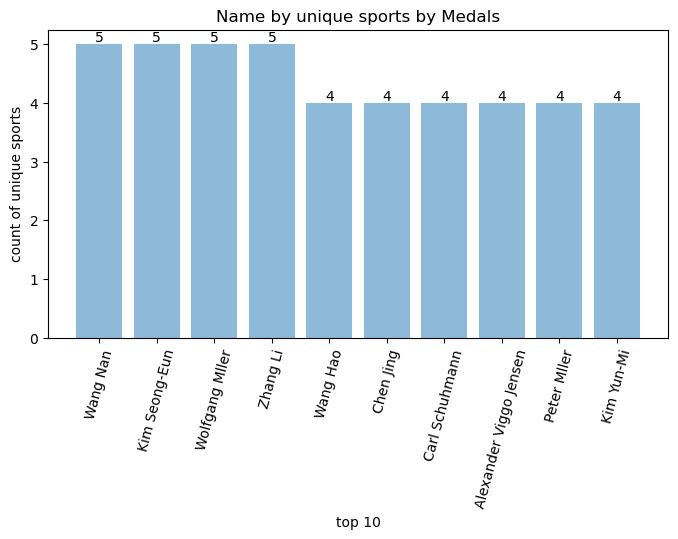

In [16]:

fig,ax = plt.subplots(figsize = (8,4))

plt.title(f'Name by unique sports by Medals')

plt.bar(x=GB3.index,height=GB3[('Sport','nunique')], alpha=0.5)

for c in ax.containers: # ajouter les label de données (la hauteur des barres)
    ax.bar_label(c)

plt.xticks(rotation =75)
plt.xlabel('top 10')
plt.ylabel('count of unique sports')
plt.show()

### Seaborn

In [17]:
GB3_ = GB3.copy()
GB3_.columns = ['Sp_nunique','Sp_count','Medal_count','Medal_nunique']
GB3_ = GB3_.reset_index()
display(GB3_)

,Name,Sp_nunique,Sp_count,Medal_count,Medal_nunique
0,Wang Nan,5,11,5,2
1,Kim Seong-Eun,5,6,0,0
2,Wolfgang Mller,5,11,0,0
3,Zhang Li,5,8,0,0
4,Wang Hao,4,11,6,2
5,Chen Jing,4,11,5,3
6,Carl Schuhmann,4,12,4,1
7,Alexander Viggo Jensen,4,12,3,3
8,Peter Mller,4,6,3,2
9,Kim Yun-Mi,4,7,2,1


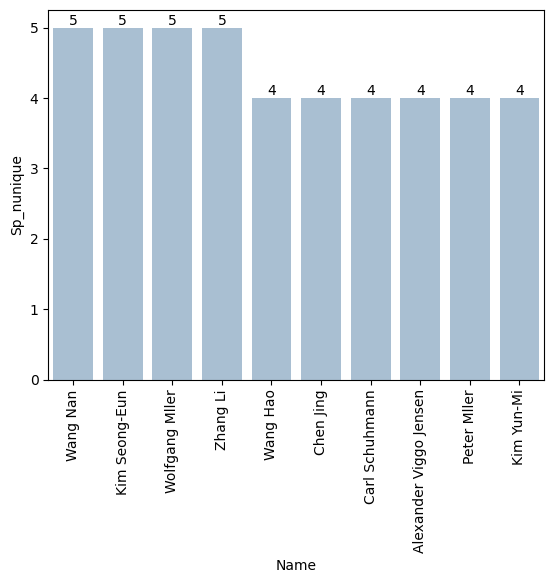

In [18]:
ax = sns.barplot(data = GB3_ 
                 ,x= 'Name'
                 ,y= 'Sp_nunique'
                 ,color='steelblue'
                 ,alpha=0.5
                )

for c in ax.containers:
    ax.bar_label(c)
    
plt.xticks(rotation=90)
plt.show()

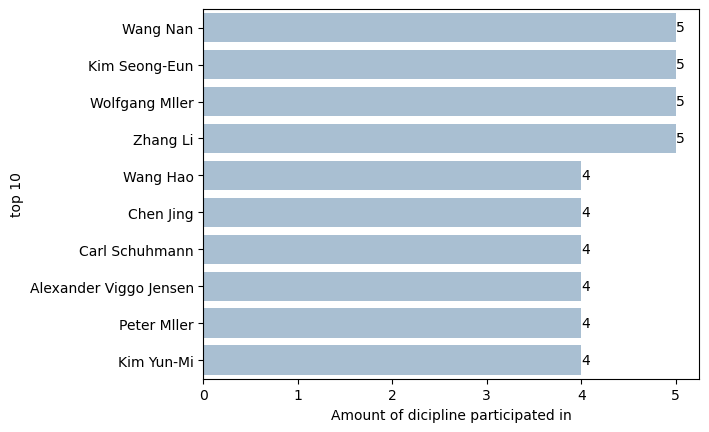

In [19]:
ax = sns.barplot(data = GB3_ 
                 ,y= 'Name'
                 ,x= 'Sp_nunique'
                 ,color='steelblue'
                 , alpha=0.5
                 #, orient='h'
                )
plt.ylabel('top 10')
plt.xlabel('Amount of dicipline participated in')

for c in ax.containers:
    ax.bar_label(c)
    
plt.show()

4. __Faire un pie-plot qui montre les info de 'Carl Schuhmann':__<br>

    - le nombre de médailles (confondues) pour chaque sport
    - avec le type de sport pour lequel cet athlète a le plus de medailles, mis en évidence



In [20]:
name = 'Carl Schuhmann' #GB3_.head(1).index[0]

print(name)
data2 = data.loc[data['Name']==name,:]
display(data2)

Carl Schuhmann


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
214346,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,Gold
214347,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN
214348,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold
214349,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Weightlifting,"Weightlifting Men's Unlimited, Two Hands",NaN
214350,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
214351,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",Gold
214352,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold
214353,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rings,NaN
214354,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,NaN
214355,107613,Carl Schuhmann,M,26.0,159.0,70.0,Germany,GER,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Long Jump,NaN


,Medal
Sport,
Gymnastics,3
Wrestling,1


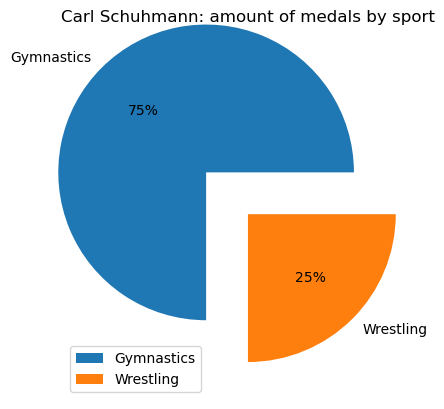

In [21]:
GB4 = (data2[['Sport','Medal']].groupby('Sport').count())
GB4 = GB4.loc[GB4.Medal>0,:].sort_values(by='Medal', ascending=False)

display(GB4)

evid = [0,]*len(GB4)
evid[0]= 0.4 #0.2 espacement

plt.title(f'{name}: amount of medals by sport')

plt.pie(labels=GB4.index
        , x= GB4.Medal
        , explode=evid
        , autopct='%1.0f%%'
       )
plt.legend(GB4.index)

#plt.tight_layout()
plt.show()

### seaborn

In [22]:
# n'existe pas


5. __Faire un histogramme qui montre:__<br>
    - l'age
    - par tranche d'age de 3 années


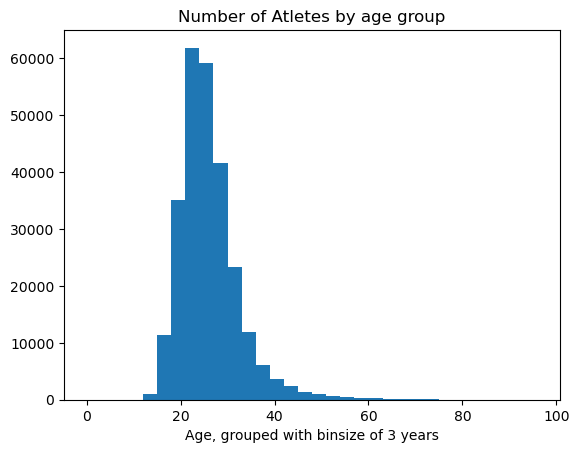

In [23]:
tranche_age= np.arange(0,data['Age'].max()+1,3) #start, stop(exclu), step

plt.title('Number of Atletes by age group')


### pas besoin de groupby
plt.hist(x=data['Age'], bins=tranche_age) 


plt.xlabel('Age, grouped with binsize of 3 years')
plt.show()

### Seaborn

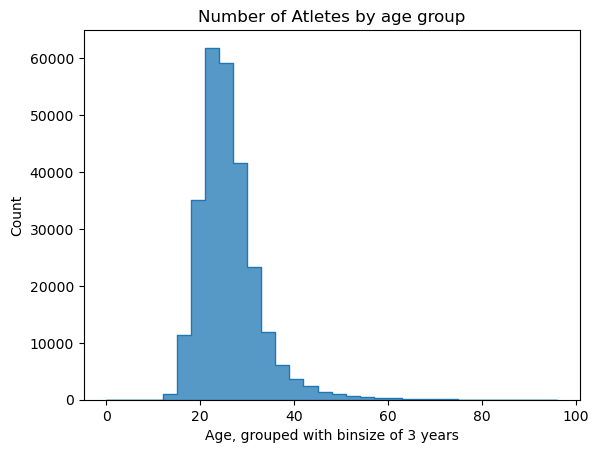

In [24]:
plt.title('Number of Atletes by age group')
plt.xlabel('Age, grouped with binsize of 3 years')

sns.histplot(data=data, x= 'Age', bins=tranche_age, element='step',)
plt.show()

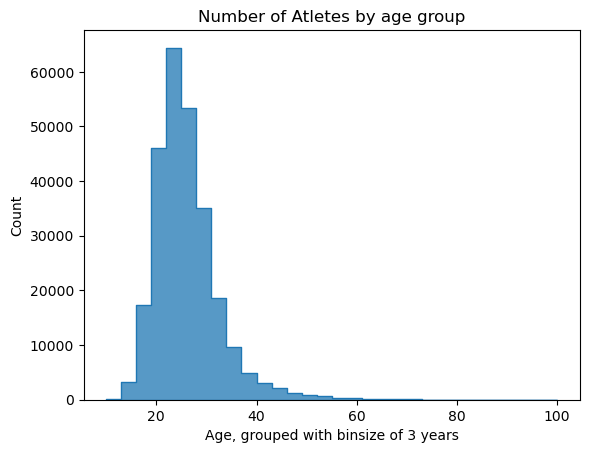

In [25]:
plt.title('Number of Atletes by age group')
plt.xlabel('Age, grouped with binsize of 3 years')


sns.histplot(data=data, x= 'Age', binwidth=3,binrange=[10,100] ,element='step',)
plt.show()

6. __Faire graphique composé d' histogrammes qui montre:__ <br>
    - la taille (height)
    - par tranche de 4 cm
    - decomposé par homme-femme
    - avec un alpha = 0.6

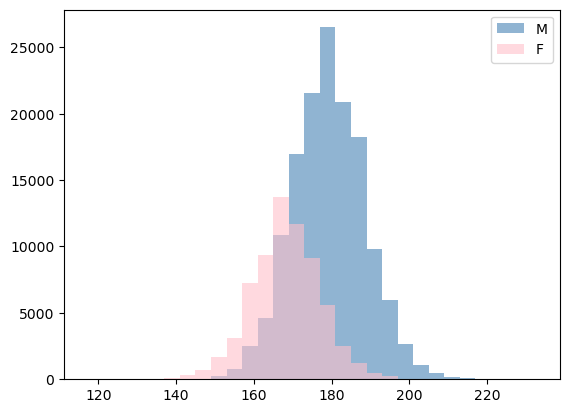

In [26]:

cond_h = data['Sex']=='M'
cond_f = data['Sex']=='F'


lst_conds = [cond_h,cond_f]
lst_colors = ['steelblue','pink']

tranche_taille= np.arange(data['Height'].min()-10,data['Height'].max()+10,4)

for i,cond in enumerate(lst_conds):
    ### pas besoin de groupby
    plt.hist(x=data.loc[cond,['Height']]
         ,bins=tranche_taille
         ,color = lst_colors[i]
         ,label = data.loc[cond,'Sex'].unique()[0] # recup 'M' ou 'F'
         ,alpha = 0.6
        )
plt.legend()
plt.show()

### Seaborn

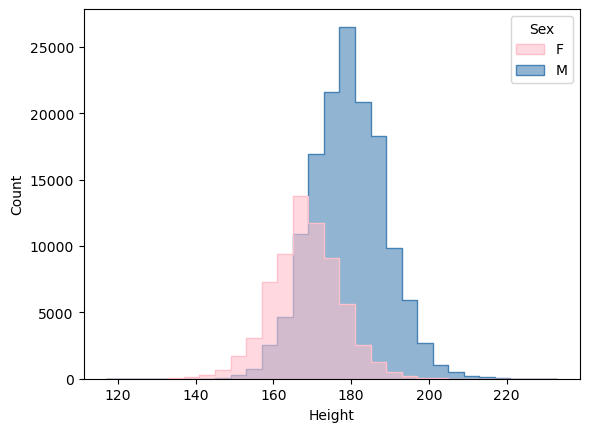

In [33]:
sns.histplot(data=data.sort_values(by='Sex',ascending=True)
             ,x = 'Height'
             ,hue='Sex'
             ,bins =tranche_taille
             #,binwidth=4
             ,palette = {'M':'steelblue','F':'pink'}
             ,element = 'step'
             ,alpha = 0.6
             
             #,cumulative=True
             #,fill=False
             #,stat= 'percent'#'count'
             #,common_norm=False
             
            )
plt.show()

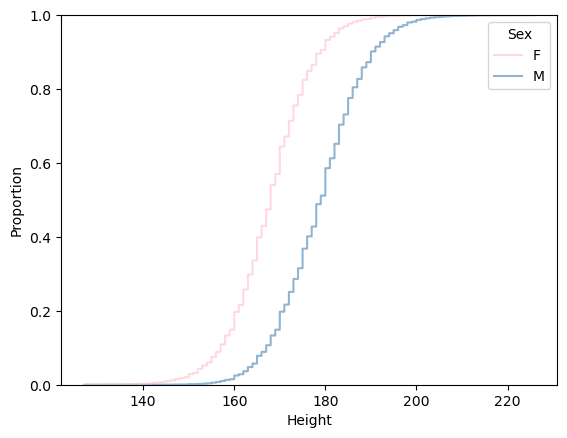

In [28]:
# empirical cumulated density function
sns.ecdfplot(data=data.sort_values(by='Sex',ascending=True)
             ,x = 'Height'
             ,hue='Sex'
             ,palette = {'M':'steelblue','F':'pink'}
             #,element = 'step'
             ,alpha = 0.6
             
             #,stat= 'percent'#'count'

            )
plt.show()